In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

import datetime
import os
import shutil

#matplotlib.rcParams['agg.path.chunksize'] = 1000
from glob import glob

matplotlib.style.use('../figure_style_2column_singleplot.mplstyle')

## test combinding drag from T1000 and T1000-15000 sims

In [3]:
drag_ibb1c2_bgk_Re280_T1000 = np.loadtxt("/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231111_054948_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_ibb1c2_Re280_cuda1/drag_coefficient.txt")
drag_ibb1c2_bgk_Re280_T1000_1500 = np.loadtxt("/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231114_113118_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-1500_ibb1c2_Re280_cuda1/drag_coefficient.txt")

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(drag_ibb1c2_bgk_Re280_T1000[:,1],drag_ibb1c2_bgk_Re280_T1000[:,2], drag_ibb1c2_bgk_Re280_T1000_1500[:,1], drag_ibb1c2_bgk_Re280_T1000_1500[:,2])
#ax.plot(drag_2[:,1],drag_2[:,2])
#ax.plot(drag_1[:,1],drag_diff[:,2])
ax.set_xlabel("physical time / s")
ax.set_ylabel("Coefficient of Drag Cd")
#ax.set_ylim([1,3])
ax.set_ylim([1,1.6])
#print(drag_diff[:,2].mean())
#ax.set_xlim([190,200])
plt.legend(labels=["Drag_0-1000", "Drag_1000-1500"])
#plt.title("")

plt.axhline(y=drag_ibb1c2_bgk_Re280_T1000_1500[int(drag_ibb1c2_bgk_Re280_T1000_1500.shape[0]*0.2-1):,2].mean(), color="r", ls="-.", lw=0.5)

In [ ]:
print("mean of last 400 sec.:", drag_ibb1c2_bgk_Re280_T1000_1500[int(drag_ibb1c2_bgk_Re280_T1000_1500.shape[0]*0.2-1):,2].mean())
print(drag_ibb1c2_bgk_Re280_T1000_1500[int(drag_ibb1c2_bgk_Re280_T1000_1500.shape[0]*0.2-1),1])

### 3D IBB1 BGK combine

In [4]:
ibb1c2_bgk_T1000_paths = [
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231109_090732_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_ibb1c2_Re200_cuda1",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231109_090755_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_ibb1c2_Re220_cuda0",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231111_054512_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_ibb1c2_Re240_cuda3",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231111_054542_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_ibb1c2_Re260_cuda2",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231111_054948_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_ibb1c2_Re280_cuda1",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231111_055030_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_ibb1c2_Re300_cuda0"
]
ibb1c2_bgk_T1000_1500_paths = [
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231113_131019_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-1500_ibb1c2_Re200_cuda1",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231113_131034_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-1500_ibb1c2_Re220_cuda0",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231114_112836_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-1500_ibb1c2_Re240_cuda3",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231114_112852_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-1500_ibb1c2_Re260_cuda2",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231114_113118_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-1500_ibb1c2_Re280_cuda1",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231114_113122_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-1500_ibb1c2_Re300_cuda0",
]

FileNotFoundError: [Errno 2] No such file or directory: '/home/mbille/Desktop/2D vs 3D/drag_plots_joint/drag_ibb1c2_bgk_T1500_Re200.png'

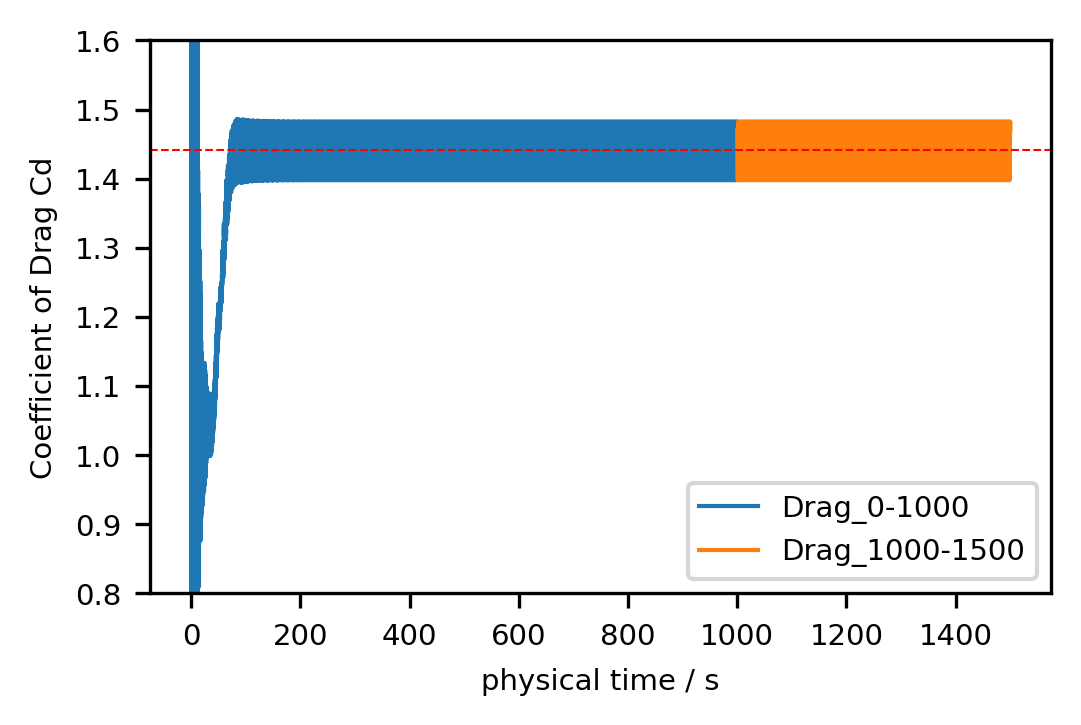

In [5]:
## DRAG
drag_filename = "/drag_coefficient.txt"

drag_means_ibb1c2_bgk = np.array([[200,220,240,260,280,300],[0,0,0,0,0,0]], dtype=float)
i=0
for baguette in range(len(ibb1c2_bgk_T1000_paths)):
    drag1 = np.loadtxt(ibb1c2_bgk_T1000_paths[baguette]+drag_filename)
    drag2 = np.loadtxt(ibb1c2_bgk_T1000_1500_paths[baguette]+drag_filename)
    drag_mean_2_from1100 = drag2[int(drag2.shape[0]*0.2-1):,2].mean()
    drag_means_ibb1c2_bgk[1,i]=drag_mean_2_from1100
    fig, ax = plt.subplots(constrained_layout=True)
    ax.plot(drag1[:,1],drag1[:,2], drag2[:,1], drag2[:,2])
    plt.axhline(y=drag_mean_2_from1100, color="r", ls="--", lw=0.5)

    ax.set_xlabel("physical time / s")
    ax.set_ylabel("Coefficient of Drag Cd")
    ax.set_ylim([0.8,1.6])
    plt.legend(labels=["Drag_0-1000", "Drag_1000-1500"])
    #plt.title("")
    plt.savefig("/home/mbille/Desktop/2D vs 3D/drag_plots_joint/drag_ibb1c2_bgk_T1500_Re"+str(int(drag_means_ibb1c2_bgk[0,i]))+".png")
    i=i+1

In [ ]:
print(drag_means_ibb1c2_bgk)

lift_max_mean_1100_1500: 0.7106351864853245
lift_max_mean_1100_1500: 0.7074723883456966
lift_max_mean_1100_1500: 0.6666448897565502
lift_max_mean_1100_1500: 0.46019606513517525
lift_max_mean_1100_1500: 0.3787180953771477
lift_max_mean_1100_1500: 0.3720064724598762


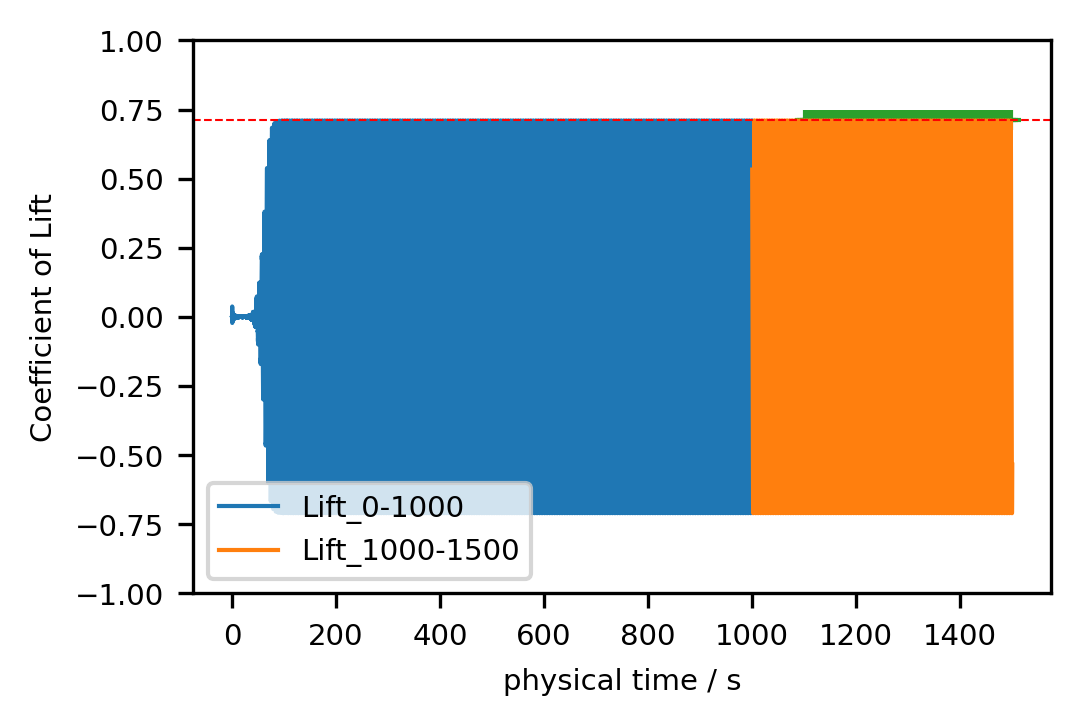

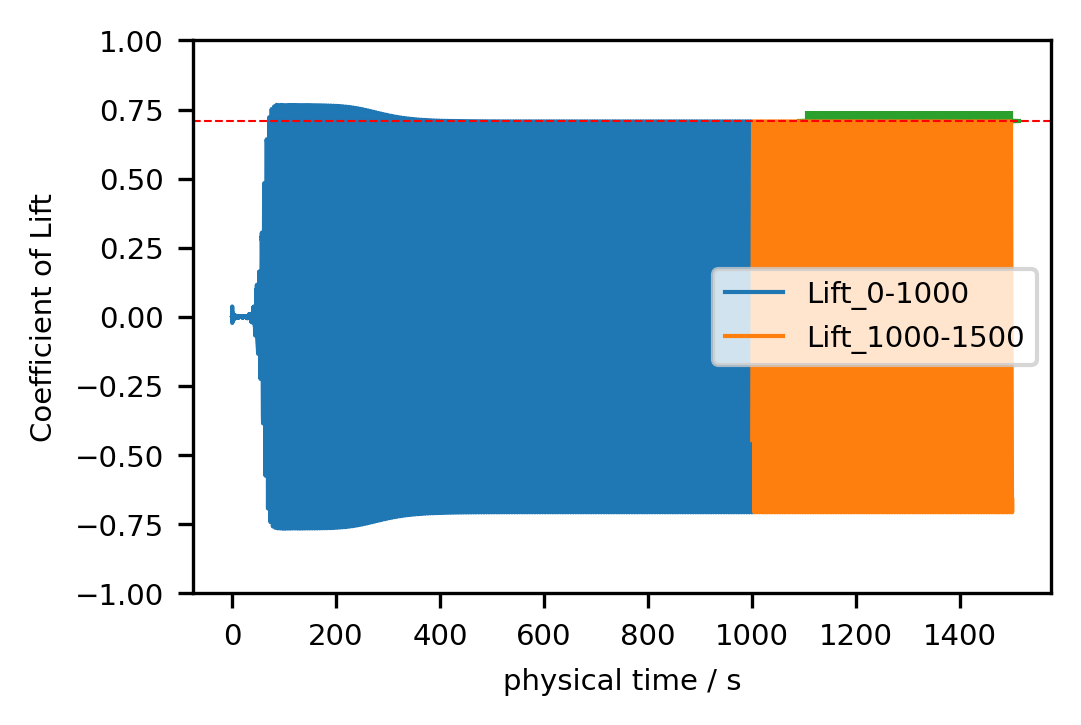

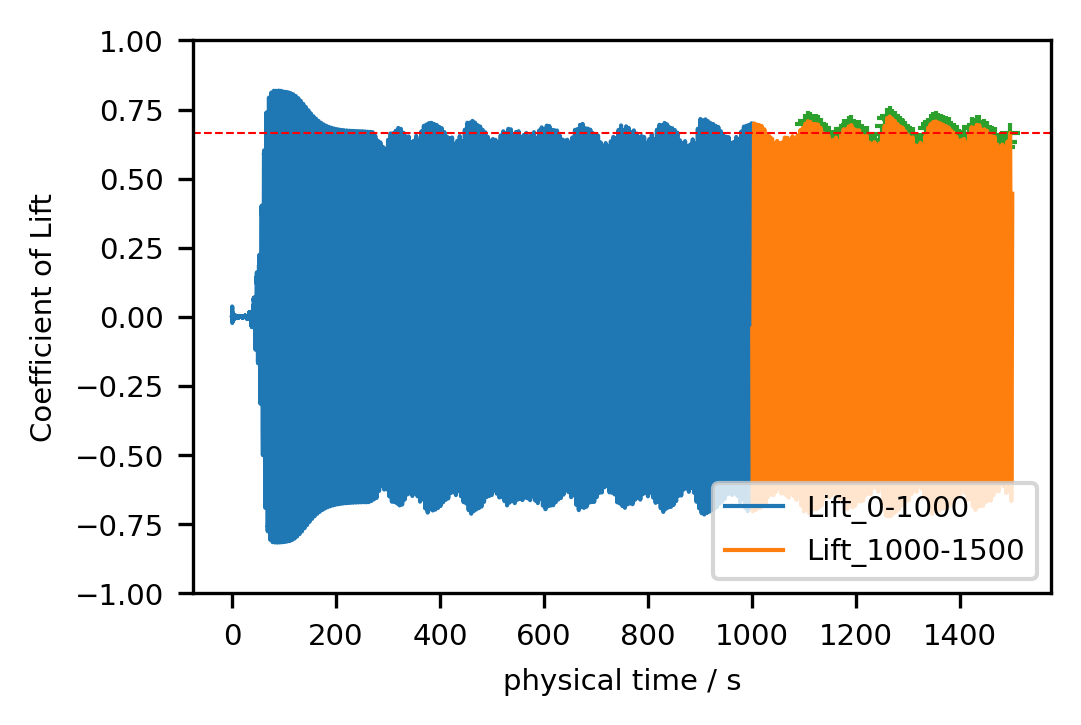

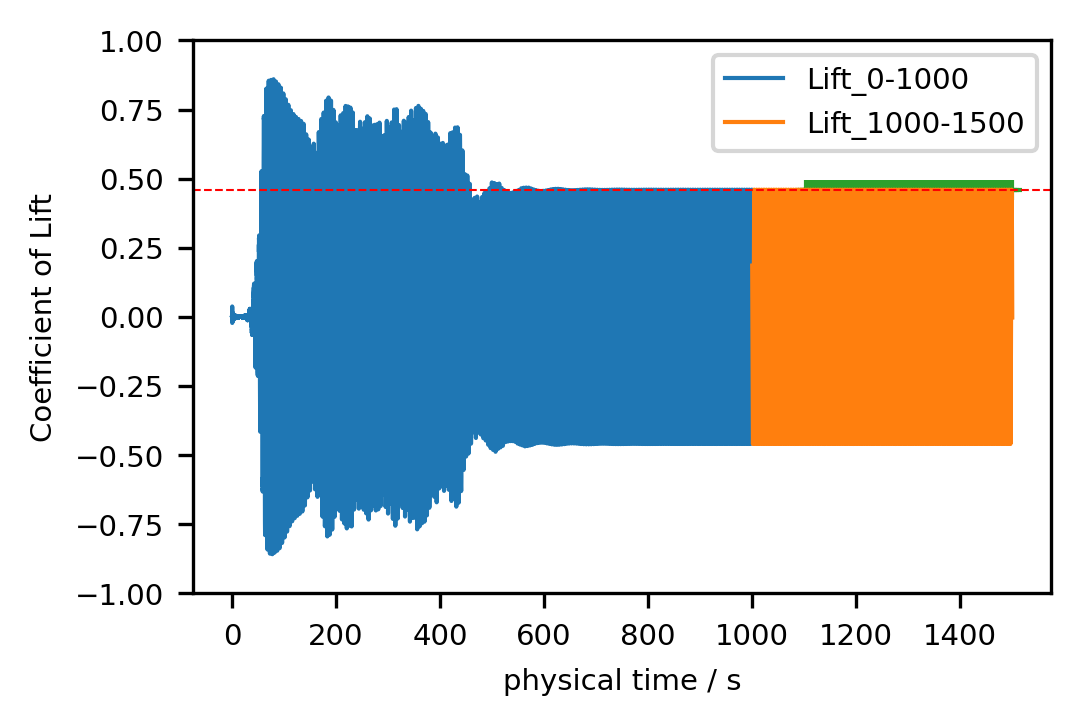

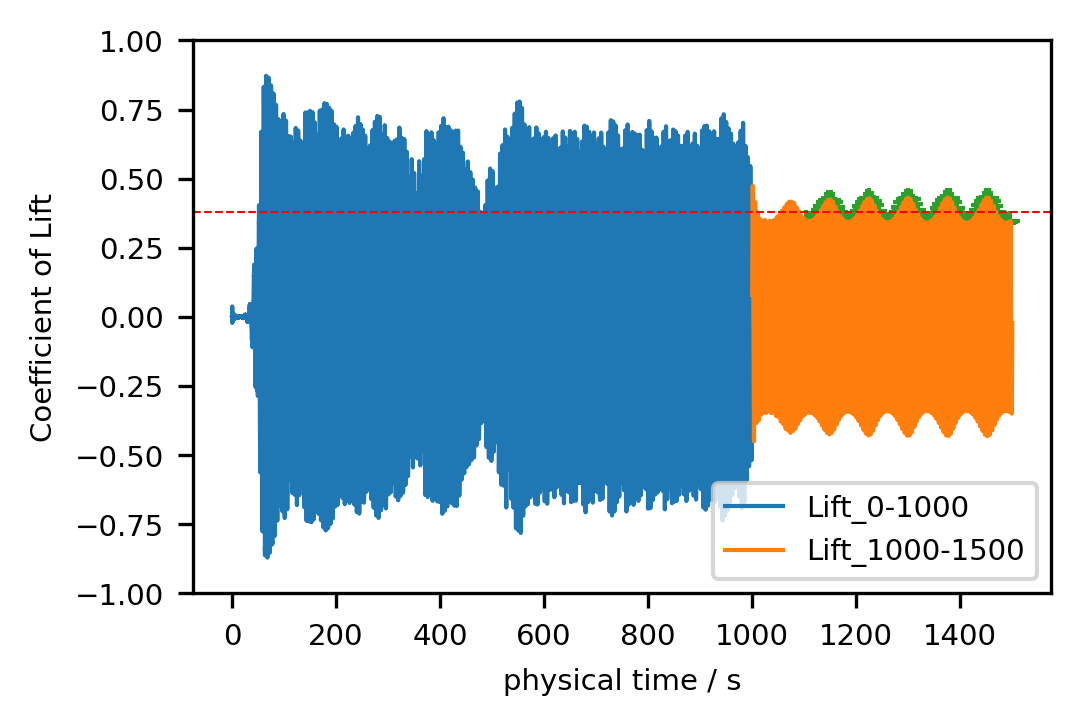

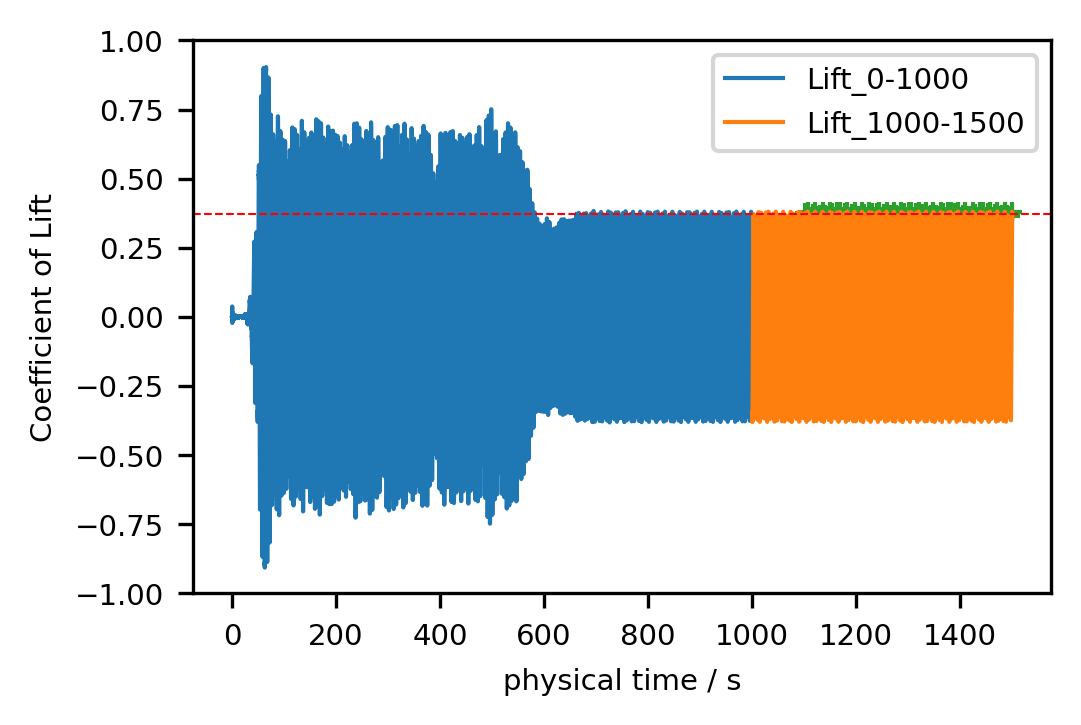

In [6]:
## LIFT
lift_filename = "/lift_coefficient.txt"
periodic_start=0.2

lift_max_means_ibb1c2_bgk = np.array([[200,220,240,260,280,300],[0,0,0,0,0,0]], dtype=float)
i=0
for baguette in range(len(ibb1c2_bgk_T1000_paths)):
    lift1 = np.loadtxt(ibb1c2_bgk_T1000_paths[baguette]+lift_filename)
    lift2 = np.loadtxt(ibb1c2_bgk_T1000_1500_paths[baguette]+lift_filename)

    #lift_combined = np.concatenate([lift1, lift2], axis=0)

    lift1100_1500 = lift2[int(lift2.shape[0]*periodic_start-1):]
    peaks_max = find_peaks(lift1100_1500[:,2], prominence=((lift1100_1500[:,2].max()+lift1100_1500[:,2].min())/2))
    fig, ax = plt.subplots(constrained_layout=True)
    ax.plot(lift1[:,1], lift1[:,2], lift2[:,1], lift2[:,2])
    #plt.plot(lift1100_1500[:,1], lift1100_1500[:,2])

    plt.scatter(lift1100_1500[peaks_max[0],1],lift1100_1500[peaks_max[0],2],marker="+", facecolors="tab:green")
    lift_max_means_ibb1c2_bgk[1,i] = lift1100_1500[peaks_max[0],2].mean()
    plt.axhline(y=lift_max_means_ibb1c2_bgk[1,i], color="r", ls="--", lw=0.5)
    ax.set_xlabel("physical time / s")
    ax.set_ylabel("Coefficient of Lift")
    ax.set_ylim([-1,1])
    plt.legend(labels=["Lift_0-1000", "Lift_1000-1500"])
    #plt.title("")
    os.makedirs("/home/mbille/Desktop/2D vs 3D/lift_plots_joint/", exist_ok=True)
    plt.savefig("/home/mbille/Desktop/2D vs 3D/lift_plots_joint/lift_ibb1c2_bgk_T1500_Re"+str(int(drag_means_ibb1c2_bgk[0,i]))+".png")

    print("lift_max_mean_1100_1500:", lift_max_means_ibb1c2_bgk[1,i])
    i=i+1

In [ ]:
print(lift_max_means_ibb1c2_bgk)

In [ ]:
### FIT SINEWAVE to converged Cl to get better St-measurement
# 1. get converged lift-curve
# 2. fit sinewave with starting-freq 0.2
# 3. store freq

import scipy

def sine_func(xx,a,b,c,d):
    return a*np.sin(2*np.pi*b*xx+c)+d

lift_filename = "/lift_coefficient.txt"
periodic_start=0.9

lift_St_fit_ibb1c2_bgk = np.array([[200,220,240,260,280,300],[0,0,0,0,0,0]], dtype=float)
i=0
for baguette in range(len(ibb1c2_bgk_T1000_paths)):
    lift1 = np.loadtxt(ibb1c2_bgk_T1000_paths[baguette]+lift_filename)
    lift2 = np.loadtxt(ibb1c2_bgk_T1000_1500_paths[baguette]+lift_filename)

    #lift_combined = np.concatenate([lift1, lift2], axis=0)

    lift_converged = lift2[int(lift2.shape[0]*periodic_start-1):]
    coefficients, values = scipy.optimize.curve_fit(sine_func, lift_converged[:,1], lift_converged[:,2], p0=(0.7,0.2,0.5,0))
    fig, ax = plt.subplots(constrained_layout=True)
    plt.plot(lift_converged[:,1], lift_converged[:,2], lift_converged[:,1], sine_func(lift_converged[:,1], *coefficients))
    plt.legend(["lfit", "fit"])
    ax.set_xlabel("physical time / s")
    ax.set_ylabel("Coefficient of Lift")
    ax.set_ylim([-1,1])
    #plt.title("")
    os.makedirs("/home/mbille/Desktop/2D vs 3D/lift_plots_St/", exist_ok=True)
    plt.savefig("/home/mbille/Desktop/2D vs 3D/lift_plots_St/lift_ibb1c2_bgk_T2000_Re"+str(int(lift_St_fit_ibb1c2_bgk[0,i]))+".png")

    lift_St_fit_ibb1c2_bgk[1,i] = coefficients[1]
    print("lift_St_fit_1700_2000:", lift_St_fit_ibb1c2_bgk[1,i])
    print("coefficients:", coefficients)
    i=i+1

In [ ]:
print(lift_St_fit_ibb1c2_bgk)

### 3D HWBB BGK combine

In [7]:
hwbbc2_bgk_T1000_paths = [
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231107_122852_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_hwbbc2_Re200_cuda:0",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231107_122852_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_hwbbc2_Re220_cuda:1",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231107_122852_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_hwbbc2_Re240_cuda:2",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231107_122852_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_hwbbc2_Re260_cuda:3",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231109_090633_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_hwbbc2_Re280_cuda3",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231109_090649_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_hwbbc2_Re300_cuda2"
]
hwbbc2_bgk_T1000_2000_paths = [
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231113_112542_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-2000_hwbbc2_Re200_cuda1",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231113_112556_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-2000_hwbbc2_Re220_cuda0",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231113_022801_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-2000_hwbbc2_Re240_cuda2",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231113_022907_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-2000_hwbbc2_Re260_cuda3",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231114_230644_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-2000_hwbbc2_Re280_cuda2",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231115_104916_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-2000_hwbbc2_Re300_cuda1",
]

In [ ]:
## DRAG
drag_filename = "/drag_coefficient.txt"

drag_means_hwbbc2_bgk = np.array([[200,220,240,260,280,300],[0,0,0,0,0,0]], dtype=float)
i=0
for baguette in range(len(hwbbc2_bgk_T1000_paths)):
    drag1 = np.loadtxt(hwbbc2_bgk_T1000_paths[baguette]+drag_filename)
    drag2 = np.loadtxt(hwbbc2_bgk_T1000_2000_paths[baguette]+drag_filename)
    drag_mean_2_from1700 = drag2[int(drag2.shape[0]*0.75-1):,2].mean()
    drag_means_hwbbc2_bgk[1,i]=drag_mean_2_from1700
    fig, ax = plt.subplots(constrained_layout=True)
    ax.plot(drag1[:,1],drag1[:,2], drag2[:,1], drag2[:,2])
    plt.axhline(y=drag_mean_2_from1700, color="r", ls="--", lw=0.5)

    ax.set_xlabel("physical time / s")
    ax.set_ylabel("Coefficient of Drag Cd")
    ax.set_ylim([0.8,1.6])
    plt.legend(labels=["Drag_0-1000", "Drag_1000-2000"])
    #plt.title("")
    plt.savefig("/home/mbille/Desktop/2D vs 3D/drag_plots_joint/drag_hwbbc2_bgk_T2000_Re"+str(int(drag_means_hwbbc2_bgk[0,i]))+".png")
    i=i+1

In [ ]:
print(drag_means_hwbbc2_bgk)

## PEAK FINDING OF Cl

In [ ]:
## LIFT
lift_filename = "/lift_coefficient.txt"
periodic_start=0.75

lift_max_means_hwbbc2_bgk = np.array([[200,220,240,260,280,300],[0,0,0,0,0,0]], dtype=float)
i=0
for baguette in range(len(hwbbc2_bgk_T1000_paths)):
    lift1 = np.loadtxt(hwbbc2_bgk_T1000_paths[baguette]+lift_filename)
    lift2 = np.loadtxt(hwbbc2_bgk_T1000_2000_paths[baguette]+lift_filename)

    #lift_combined = np.concatenate([lift1, lift2], axis=0)

    lift_converged = lift2[int(lift2.shape[0]*periodic_start-1):]
    peaks_max = find_peaks(lift_converged[:,2], prominence=((lift_converged[:,2].max()+lift_converged[:,2].min())/2))
    fig, ax = plt.subplots(constrained_layout=True)
    ax.plot(lift1[:,1], lift1[:,2], lift2[:,1], lift2[:,2])
    #plt.plot(lift1100_1500[:,1], lift1100_1500[:,2])

    plt.scatter(lift_converged[peaks_max[0],1],lift_converged[peaks_max[0],2],marker="+", facecolors="r")
    lift_max_means_hwbbc2_bgk[1,i] = lift_converged[peaks_max[0],2].mean()
    plt.axhline(y=lift_max_means_hwbbc2_bgk[1,i], color="r", ls="--", lw=0.5)
    ax.set_xlabel("physical time / s")
    ax.set_ylabel("Coefficient of Lift")
    ax.set_ylim([-1,1])
    plt.legend(labels=["Lift_0-1000", "Lift_1000-1500"])
    #plt.title("")
    os.makedirs("/home/mbille/Desktop/2D vs 3D/lift_plots_joint/", exist_ok=True)
    plt.savefig("/home/mbille/Desktop/2D vs 3D/lift_plots_joint/lift_hwbbc2_bgk_T2000_Re"+str(int(drag_means_hwbbc2_bgk[0,i]))+".png")

    print("lift_max_mean_1100_1500:", lift_max_means_hwbbc2_bgk[1,i])
    i=i+1

In [ ]:
print(lift_max_means_hwbbc2_bgk)

In [ ]:
### FIT SINEWAVE to converged Cl to get better St-measurement
# 1. get converged lift-curve
# 2. fit sinewave with starting-freq 0.2
# 3. store freq

import scipy

def sine_func(xx,a,b,c,d):
    return a*np.sin(2*np.pi*b*xx+c)+d

lift_filename = "/lift_coefficient.txt"
periodic_start=0.9

lift_St_fit_hwbbc2_bgk = np.array([[200,220,240,260,280,300],[0,0,0,0,0,0]], dtype=float)
i=0
for baguette in range(len(hwbbc2_bgk_T1000_paths)):
    lift1 = np.loadtxt(hwbbc2_bgk_T1000_paths[baguette]+lift_filename)
    lift2 = np.loadtxt(hwbbc2_bgk_T1000_2000_paths[baguette]+lift_filename)

    #lift_combined = np.concatenate([lift1, lift2], axis=0)

    lift_converged = lift2[int(lift2.shape[0]*periodic_start-1):]
    coefficients, values = scipy.optimize.curve_fit(sine_func, lift_converged[:,1], lift_converged[:,2], p0=(0.7,0.2,0.5,0))
    fig, ax = plt.subplots(constrained_layout=True)
    plt.plot(lift_converged[:,1], lift_converged[:,2], lift_converged[:,1], sine_func(lift_converged[:,1], *coefficients))
    plt.legend(["lfit", "fit"])
    ax.set_xlabel("physical time / s")
    ax.set_ylabel("Coefficient of Lift")
    ax.set_ylim([-1,1])
    #plt.title("")
    os.makedirs("/home/mbille/Desktop/2D vs 3D/lift_plots_St/", exist_ok=True)
    plt.savefig("/home/mbille/Desktop/2D vs 3D/lift_plots_St/lift_hwbbc2_bgk_T2000_Re"+str(int(lift_St_fit_hwbbc2_bgk[0,i]))+".png")

    lift_St_fit_hwbbc2_bgk[1,i] = coefficients[1]
    print("lift_St_fit_1700_2000:", lift_St_fit_hwbbc2_bgk[1,i])
    print("coefficients:", coefficients)
    i=i+1

In [ ]:
print({lift_St_fit_hwbbc2_bgk})

# TEST FITTING sinewave to 2D DpY T500

In [8]:
base_path = "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/"

dpy200_fwbb_bgk_paths = [
    "data_231114_145114_2d_GPD30_T500_Re200_DpY10_fwbbc_bgk_cuda3",
    "data_231114_152427_2d_GPD30_T500_Re200_DpY20_fwbbc_bgk_cuda2",
    "data_231114_165702_2d_GPD30_T500_Re200_DpY40_fwbbc_bgk_cuda0",
    "data_231114_230015_2d_GPD30_T500_Re200_DpY60_fwbbc_bgk_cuda2",
    "data_231114_145511_2d_GPD30_T500_Re200_DpY80_fwbbc_bgk_cuda3",
    "data_231027_165537_c2d_DpY100_T500_Re200_fwbbc_bgk_cuda3",
    "data_231031_125438_2d_DpY200_GPD30_T500_Re200_fwbbc_bgk_cuda:2"
]
dpy200_fwbb_bgk_DpYs = [10,20,40,60,80,100,200]

dpy200_fwbb_kbc_paths = [
    "data_231114_145121_2d_GPD30_T500_Re200_DpY10_fwbbc_kbc_cuda2",
    "data_231114_152503_2d_GPD30_T500_Re200_DpY20_fwbbc_kbc_cuda0",
    "data_231114_171539_2d_GPD30_T500_Re200_DpY40_fwbbc_kbc_cuda2",
    "data_231114_234630_2d_GPD30_T500_Re200_DpY60_fwbbc_kbc_cuda0",
    "data_231114_145520_2d_GPD30_T500_Re200_DpY80_fwbbc_kbc_cuda2",
    "data_231027_165545_c2d_DpY100_T500_Re200_fwbbc_kbc_cuda2",
    "data_231025_202608_2d_correctMP1_DpY_Re200_fwbbc_kbc_GPD30_DpY125_cuda:0",
    "data_231025_202608_2d_correctMP1_DpY_Re200_fwbbc_kbc_GPD30_DpY150_cuda:1",
    "data_231025_202608_2d_correctMP1_DpY_Re200_fwbbc_kbc_GPD30_DpY175_cuda:2",
    #"data_231031_125438_2d_DpY200_GPD30_T500_Re200_fwbbc_kbc_cuda:3", not finished
    "data_231107_122644_2d_DpY200_GPD30_T400_KBC_fwbbc_Re200_cuda:0"
]
dpy200_fwbb_kbc_DpYs = [10,20,40,60,80,100,125,150,175,200]

dpy200_hwbb_bgk_paths = [
    "data_231114_145131_2d_GPD30_T500_Re200_DpY10_hwbbc2_bgk_cuda1",
    "data_231114_154305_2d_GPD30_T500_Re200_DpY20_hwbbc2_bgk_cuda3",
    "data_231114_172625_2d_GPD30_T500_Re200_DpY40_hwbbc2_bgk_cuda1",
    "data_231114_235617_2d_GPD30_T500_Re200_DpY60_hwbbc2_bgk_cuda3",
    "data_231114_145530_2d_GPD30_T500_Re200_DpY80_hwbbc2_bgk_cuda1",
    "data_231027_165556_c2d_DpY100_T500_Re200_hwbbc2_bgk_cuda1",
    "data_231105_115214_2d_DpY200_GPD30_T500_Re200_hwbbc2_bgk_cuda:2"
]
dpy200_hwbb_bgk_DpYs = [10,20,40,60,80,100,200]

dpy200_hwbb_kbc_paths = [
    "data_231114_145141_2d_GPD30_T500_Re200_DpY10_hwbbc2_kbc_cuda0",
    "data_231114_155415_2d_GPD30_T500_Re200_DpY20_hwbbc2_kbc_cuda1",
    "data_231114_181121_2d_GPD30_T500_Re200_DpY40_hwbbc2_kbc_cuda3",
    "data_231115_023632_2d_GPD30_T500_Re200_DpY60_hwbbc2_kbc_cuda1",
    "data_231114_145540_2d_GPD30_T500_Re200_DpY80_hwbbc2_kbc_cuda0",
    "data_231027_165606_c2d_DpY100_T500_Re200_hwbbc2_kbc_cuda0",
   # "data_231105_115214_2d_DpY200_GPD30_T500_Re200_hwbbc2_kbc_cuda:3" DNF
    "data_231107_122644_2d_DpY200_GPD30_T400_KBC_hwbbc2_Re200_cuda:1"
]
dpy200_hwbb_kbc_DpYs = [10,20,40,60,80,100,200]

dpy200_ibb1_bgk_paths = [
    "data_231114_151410_2d_GPD30_T500_Re200_DpY10_ibb1c2_bgk_cuda3",
    "data_231114_161932_2d_GPD30_T500_Re200_DpY20_ibb1c2_bgk_cuda2",
    "data_231114_202118_2d_GPD30_T500_Re200_DpY40_ibb1c2_bgk_cuda0",
    "data_231115_063255_2d_GPD30_T500_Re200_DpY60_ibb1c2_bgk_cuda2",
    "data_231114_214729_2d_GPD30_T500_Re200_DpY80_ibb1c2_bgk_cuda3",
    "data_231028_134313_c2d_DpY100_T500_Re200_ibb1c2_bgk_cuda3",
    "data_231102_115255_2d_DpY200_GPD30_T500_Re200_ibb1c2_bgk_cuda:2"
]
dpy200_ibb1_bgk_DpYs = [10,20,40,60,80,100,200]

dpy200_ibb1_kbc_paths = [
    "data_231114_151453_2d_GPD30_T500_Re200_DpY10_ibb1c2_kbc_cuda1",
    "data_231114_163821_2d_GPD30_T500_Re200_DpY20_ibb1c2_kbc_cuda3",
    "data_231114_205048_2d_GPD30_T500_Re200_DpY40_ibb1c2_kbc_cuda1",
    "data_231115_072925_2d_GPD30_T500_Re200_DpY60_ibb1c2_kbc_cuda3",
    "data_231114_214819_2d_GPD30_T500_Re200_DpY80_ibb1c2_kbc_cuda1",
    "data_231028_134316_c2d_DpY100_T500_Re200_ibb1c2_kbc_cuda1",
    #"data_231102_115255_2d_DpY200_GPD30_T500_Re200_ibb1c2_kbc_cuda:3" DNF
    "data_231107_122644_2d_DpY200_GPD30_T400_KBC_ibb1c2_Re200_cuda:2"
]
dpy200_ibb1_kbc_DpYs = [10,20,40,60,80,100,200]

In [ ]:
### FIT SINEWAVE to converged Cl to get better St-measurement
# 1. get converged lift-curve
# 2. fit sinewave with starting-freq 0.2
# 3. store freq

import scipy

def sine_func(xx,a,b,c,d):
    return a*np.sin(2*np.pi*b*xx+c)+d

lift_filename = "/lift_coefficient.txt"
periodic_start=0.95

#DpY
lift_St_fit = np.array([[10,20,40,60,80,100],[0,0,0,0,0,0]], dtype=float)
i=0

variants_path = [dpy200_fwbb_bgk_paths, dpy200_fwbb_kbc_paths, dpy200_hwbb_bgk_paths, dpy200_hwbb_kbc_paths, dpy200_ibb1_bgk_paths, dpy200_ibb1_kbc_paths]
variants_dpy = [dpy200_fwbb_bgk_DpYs, dpy200_fwbb_kbc_DpYs, dpy200_hwbb_bgk_DpYs, dpy200_hwbb_kbc_DpYs, dpy200_ibb1_bgk_DpYs, dpy200_ibb1_kbc_DpYs]
k=5

lift_St_fit = np.zeros((len(variants_path[k]),))
print("len von variants ist:", len(variants_path[k]))
print("shape von lift_St_fit ist:", lift_St_fit.shape)
for baguette in range(len(variants_path[k])):
    lift = np.loadtxt(base_path+variants_path[k][baguette]+lift_filename)

    #lift_combined = np.concatenate([lift1, lift2], axis=0)

    lift_converged = lift[int(lift.shape[0]*periodic_start-1):]
    coefficients, values = scipy.optimize.curve_fit(sine_func, lift_converged[:,1], lift_converged[:,2], p0=(0.7,0.2,0.5,0))
    fig, ax = plt.subplots(constrained_layout=True)
    plt.plot(lift_converged[:,1], lift_converged[:,2], lift_converged[:,1], sine_func(lift_converged[:,1], *coefficients))
    plt.legend(["lift", "fit"])
    ax.set_xlabel("physical time / s")
    ax.set_ylabel("Coefficient of Lift")
    ax.set_ylim([-1,1])
    #plt.title("")
 #   os.makedirs("/home/mbille/Desktop/2D vs 3D/lift_plots_St_DpY_Re200/", exist_ok=True)
  #  plt.savefig("/home/mbille/Desktop/2D vs 3D/lift_plots_St_DpY_Re200/lift_ibb1c2_bgk_Re200_DpY"+str(int(lift_St_fit_hwbbc2_bgk[0,i]))+".png")

    lift_St_fit[i] = coefficients[1]
    print("lift_St_fit:", lift_St_fit[i])
    print("coefficients:", coefficients)
    i=i+1
print(lift_St_fit)

In [ ]:
## LIFT
lift_filename = "/lift_coefficient.txt"
periodic_start=0.75

lift_max_means_hwbbc2_bgk = np.array([[200,220,240,260,280,300],[0,0,0,0,0,0]], dtype=float)

variants_path = [dpy200_fwbb_bgk_paths, dpy200_fwbb_kbc_paths, dpy200_hwbb_bgk_paths, dpy200_hwbb_kbc_paths, dpy200_ibb1_bgk_paths, dpy200_ibb1_kbc_paths]
variants_dpy = [dpy200_fwbb_bgk_DpYs, dpy200_fwbb_kbc_DpYs, dpy200_hwbb_bgk_DpYs, dpy200_hwbb_kbc_DpYs, dpy200_ibb1_bgk_DpYs, dpy200_ibb1_kbc_DpYs]
k=1
for k in range(6):
    i=0
    lift_Cl_fit = np.zeros((len(variants_path[k]),))

    for baguette in range(len(variants_path[k])):
        lift = np.loadtxt(base_path+variants_path[k][baguette]+lift_filename)

        lift_converged = lift[int(lift.shape[0]*periodic_start-1):]

        #peaks_max = find_peaks(lift_converged[:,2], prominence=((lift_converged[:,2].max()+lift_converged[:,2].min())/2))
        peaks_max = find_peaks(lift_converged[:,2], prominence=(lift_converged[:,2].max()*0.5))
        fig, ax = plt.subplots(constrained_layout=True)
        ax.plot(lift[:,1], lift[:,2])

        plt.scatter(lift_converged[peaks_max[0],1],lift_converged[peaks_max[0],2],marker="+", facecolors="r")
        lift_Cl_fit[i] = lift_converged[peaks_max[0],2].mean()
        plt.axhline(y=lift_Cl_fit[i], color="r", ls="--", lw=0.5)
        ax.set_xlabel("physical time / s")
        ax.set_ylabel("Coefficient of Lift")
        ax.set_ylim([-1,1])
        plt.legend(labels=["Lift","max_mean"])
        #plt.title("")
        #os.makedirs("/home/mbille/Desktop/2D vs 3D/lift_plots_joint/", exist_ok=True)
        #plt.savefig("/home/mbille/Desktop/2D vs 3D/lift_plots_joint/lift_hwbbc2_bgk_T2000_Re"+str(int(drag_means_hwbbc2_bgk[0,i]))+".png")

        i=i+1
    print(lift_Cl_fit)

# plot Drag, comparing 2D and 3D simulations over Re200 to 300

## 2D comparison Re100-300

In [9]:
### CREATE PATH-DICT
# VARS: Re, BC

res = np.arange(100,320,20)  # Re 100-300 in steps of 20
bcs = ["hwbbc2", "ibb1c2"]

base_path = "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231031_c2d_compare3D_fineRe100-300_GPD30_DpY10_BGK_T300"

paths_dict = dict() # path matches
res_dict = dict() # lists of available re

# create path_dict: keys= bc_re Combination, values: lists of paths
for bc in bcs:
    for re in res:
        paths_dict[bc+"_Re"+str(re)] = []
        res_dict[bc+"_Re"+str(re)] = []
        dir_names = glob(base_path+"/*c2d_compare3D_fineRe100-300_GPD30_DpY10_BGK_T300_"+bc+"_Re"+str(re)+"_*")
        if len(dir_names)>1:
            print("(!) Warning: more than 1 simulation for:", bc+"_Re"+str(re))
            print(dir_names)
        elif len(dir_names) == 1:
            # this is what we want: one unique simulation found
            paths_dict[bc+"_Re"+str(re)].append(*dir_names)
            res_dict[bc+"_Re"+str(re)].append(re)

In [10]:
### LOAD DRAG TIMESERIES 2D
filename = "/drag_coefficient.txt"

# dict of timeseries, analog to path_dict
drag_timeseries = dict()

res = np.arange(100,320,20)  # Re 100-300 in steps of 20
bcs = ["hwbbc2", "ibb1c2"]
for bc in bcs:
    for re in res:
        print("loading:", bc+"_Re"+str(re))
        drag_timeseries[bc+"_Re"+str(re)] = np.loadtxt(paths_dict[bc+"_Re"+str(re)][0]+filename)

loading: hwbbc2_Re100
loading: hwbbc2_Re120
loading: hwbbc2_Re140
loading: hwbbc2_Re160
loading: hwbbc2_Re180
loading: hwbbc2_Re200
loading: hwbbc2_Re220
loading: hwbbc2_Re240
loading: hwbbc2_Re260
loading: hwbbc2_Re280
loading: hwbbc2_Re300
loading: ibb1c2_Re100
loading: ibb1c2_Re120
loading: ibb1c2_Re140
loading: ibb1c2_Re160
loading: ibb1c2_Re180
loading: ibb1c2_Re200
loading: ibb1c2_Re220
loading: ibb1c2_Re240
loading: ibb1c2_Re260
loading: ibb1c2_Re280
loading: ibb1c2_Re300


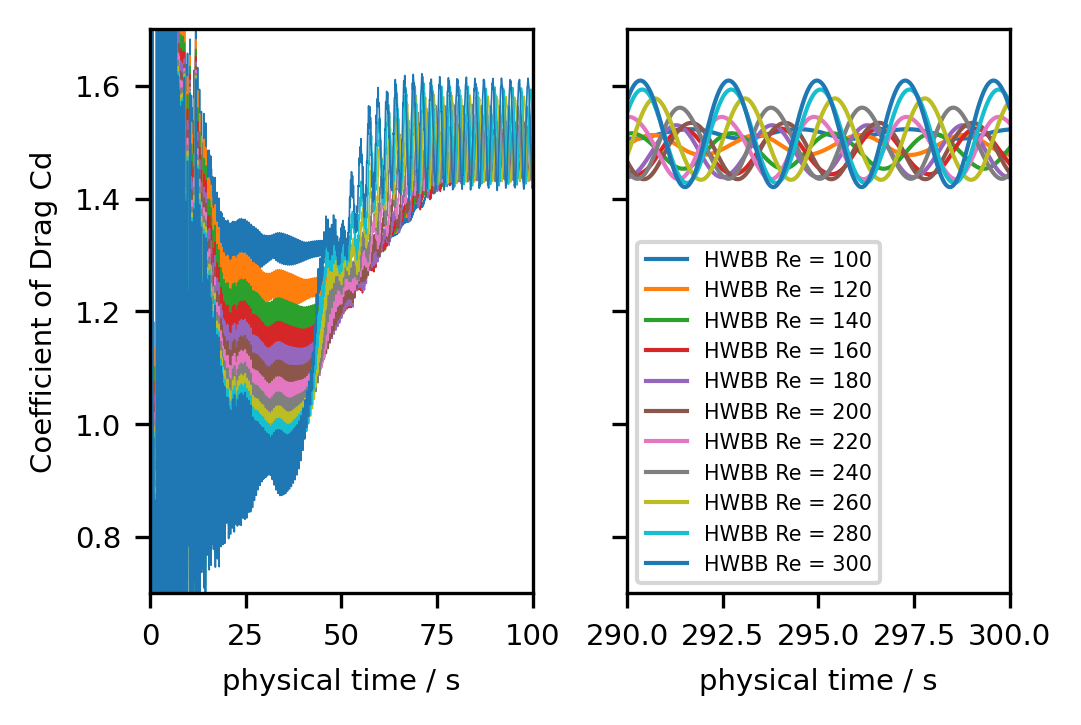

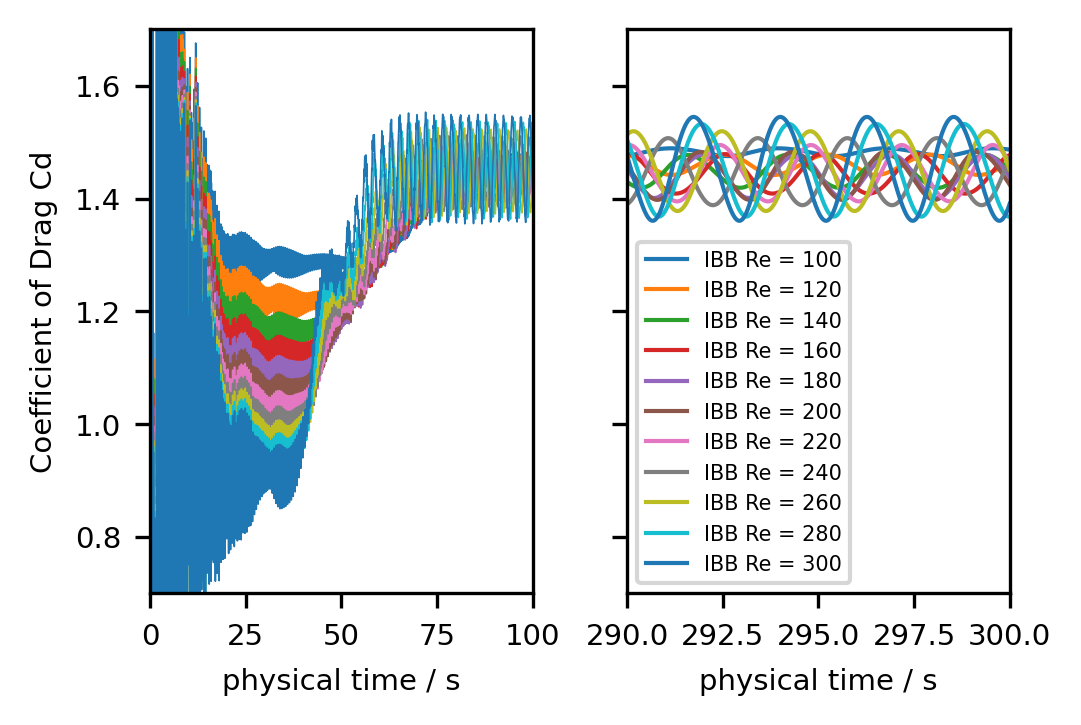

In [11]:
### plot Drag Coefficients over time
# plot01: all Re for hwbb, all Re for ibb1c2
# plot02: sets of 2 or 5 Re for both BC
# plot03 (?): plot selection of 2 tp 5 Re for both BC (100,200,300)

#res = np.arange(200,320,20)
res = np.arange(100,320,20)  # Re 100-300 in steps of 20
bcs = ["hwbbc2", "ibb1c2"]
for bc in bcs:
    fig, axs = plt.subplots(1,2)
    if bc == "hwbbc2":
        bc_label = "HWBB"
    elif bc == "ibb1c2":
        bc_label = "IBB"
    for re in res:
        axs[0].plot(drag_timeseries[bc+"_Re"+str(re)][:,1], drag_timeseries[bc+"_Re"+str(re)][:,2], marker="", linewidth=0.4, label=bc_label+" Re = "+str(re))
        axs[1].plot(drag_timeseries[bc+"_Re"+str(re)][:,1], drag_timeseries[bc+"_Re"+str(re)][:,2], marker="", label=bc_label+" Re = "+str(re))
    for ax in axs.flat:
        ax.set_xlabel("physical time / s")
        ax.label_outer()
        ax.set_ylim([0.7,1.7])

    axs[0].set_xlim([0,100])
    axs[1].set_xlim([290,300])
    axs[0].set_ylabel("Coefficient of Drag Cd")
    axs[1].legend(fontsize=5)
    #plt.savefig("/home/mbille/Desktop/2D vs 3D/drag_2D/Drag_"+bc+".png")
    plt.savefig("/home/mbille/lettuce/plotting_mp2/plots/2D_Drag_timeseries_"+bc+".png")

## 2D3D compare Re200-300 for BC

In [ ]:
### LOAD DATA for 3D
##DONE# append timeseries
##DONE# store timeseries in new DIR
### start plotting comparison

## combine 3D data timeseries into single named timeseries in folder

In [12]:
ibb1c2_bgk_T1000_paths = [
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231109_090732_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_ibb1c2_Re200_cuda1",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231109_090755_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_ibb1c2_Re220_cuda0",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231111_054512_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_ibb1c2_Re240_cuda3",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231111_054542_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_ibb1c2_Re260_cuda2",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231111_054948_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_ibb1c2_Re280_cuda1",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231111_055030_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_ibb1c2_Re300_cuda0"
]
ibb1c2_bgk_T1000_1500_paths = [
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231113_131019_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-1500_ibb1c2_Re200_cuda1",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231113_131034_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-1500_ibb1c2_Re220_cuda0",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231114_112836_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-1500_ibb1c2_Re240_cuda3",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231114_112852_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-1500_ibb1c2_Re260_cuda2",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231114_113118_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-1500_ibb1c2_Re280_cuda1",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231114_113122_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-1500_ibb1c2_Re300_cuda0",
]
res = [200,220,240,260,280,300]

target_basepath="/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_c3d_compare2D_fineRe200-300_GPD30_DpY10_BGK_T3000"

drag_filename = "/drag_coefficient.txt"
i=0
for baguette in range(len(ibb1c2_bgk_T1000_paths)):
    drag1 = np.loadtxt(ibb1c2_bgk_T1000_paths[baguette]+drag_filename)
    drag2 = np.loadtxt(ibb1c2_bgk_T1000_1500_paths[baguette]+drag_filename)
    drag_combined = np.concatenate([drag1, drag2], axis=0)
    np.savetxt(target_basepath+"/drag_ibb1c2_Re"+str(res[i])+".txt", drag_combined)
    i=i+1
    # fig, ax = plt.subplots(constrained_layout=True)
    # plt.plot(drag1[:,1],drag1[:,2], drag2[:,1], drag2[:,2], drag_combined[:,1], drag_combined[:,2])
    # plt.legend(["1", "2", "combined"])
    # ax.set_xlabel("physical time / s")
    # ax.set_ylabel("Coefficient of Drag Cd")
    # ax.set_ylim([0.8,1.6])

In [13]:
hwbbc2_bgk_T1000_paths = [
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231107_122852_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_hwbbc2_Re200_cuda:0",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231107_122852_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_hwbbc2_Re220_cuda:1",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231107_122852_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_hwbbc2_Re240_cuda:2",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231107_122852_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_hwbbc2_Re260_cuda:3",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231109_090633_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_hwbbc2_Re280_cuda3",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231109_090649_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000_hwbbc2_Re300_cuda2"
]
hwbbc2_bgk_T1000_2000_paths = [
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231113_112542_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-2000_hwbbc2_Re200_cuda1",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231113_112556_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-2000_hwbbc2_Re220_cuda0",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231113_022801_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-2000_hwbbc2_Re240_cuda2",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231113_022907_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-2000_hwbbc2_Re260_cuda3",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231114_230644_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-2000_hwbbc2_Re280_cuda2",
    "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_231115_104916_c3d_compare2D_fineRe200-300_GPD30_DpY10_DpZ3_BGK_T1000-2000_hwbbc2_Re300_cuda1",
]

res = [200,220,240,260,280,300]

target_basepath="/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_c3d_compare2D_fineRe200-300_GPD30_DpY10_BGK_T3000"

drag_filename = "/drag_coefficient.txt"
i=0
for baguette in range(len(hwbbc2_bgk_T1000_paths)):
    drag1 = np.loadtxt(hwbbc2_bgk_T1000_paths[baguette]+drag_filename)
    drag2 = np.loadtxt(hwbbc2_bgk_T1000_2000_paths[baguette]+drag_filename)
    drag_combined = np.concatenate([drag1, drag2], axis=0)
    np.savetxt(target_basepath+"/drag_hwbbc2_Re"+str(res[i])+".txt", drag_combined)
    i=i+1

## 2D3D compare Re200-300 HWBB vs. IBB1

In [14]:
### LOAD 3D Drag-timeseries (combined) into dict

res = np.arange(200,320,20)  # Re 100-300 in steps of 20
bcs = ["hwbbc2", "ibb1c2"]

base_path = "/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_c3d_compare2D_fineRe200-300_GPD30_DpY10_BGK_T3000"

drag_timeseries_3d = dict()

for bc in bcs:
    for re in res:
        print("loading:", bc+"_Re"+str(re))
        drag_timeseries_3d[bc+"_Re"+str(re)] = np.loadtxt(base_path+"/drag_"+bc+"_Re"+str(re)+".txt")

loading: hwbbc2_Re200
loading: hwbbc2_Re220
loading: hwbbc2_Re240
loading: hwbbc2_Re260
loading: hwbbc2_Re280
loading: hwbbc2_Re300
loading: ibb1c2_Re200
loading: ibb1c2_Re220
loading: ibb1c2_Re240
loading: ibb1c2_Re260
loading: ibb1c2_Re280
loading: ibb1c2_Re300


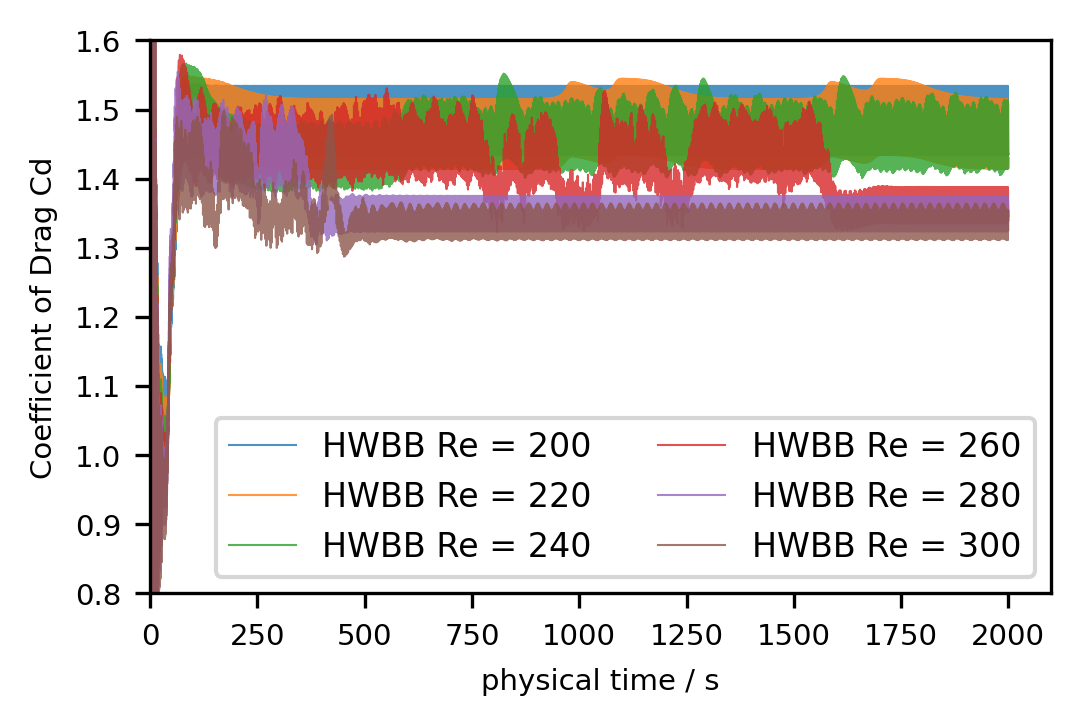

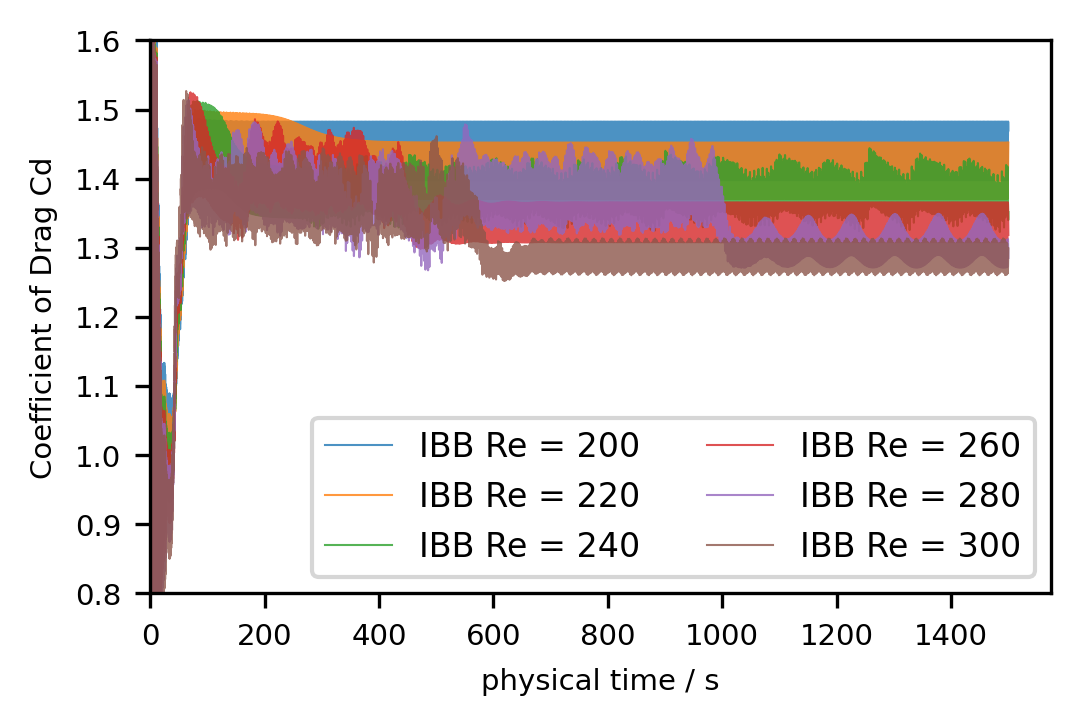

In [15]:
### plot DRAG for BCs and Res
res = np.arange(200,320,20)  # Re 100-300 in steps of 20
bcs = ["hwbbc2", "ibb1c2"]
for bc in bcs:
    fig, ax = plt.subplots()
    if bc == "hwbbc2":
        bc_label = "HWBB"
    elif bc == "ibb1c2":
        bc_label = "IBB"
    for re in res:
        ax.plot(drag_timeseries_3d[bc+"_Re"+str(re)][:,1], drag_timeseries_3d[bc+"_Re"+str(re)][:,2], marker="", linewidth=0.5, label=bc_label+" Re = "+str(re), alpha=0.8)
        #axs[1].plot(drag_timeseries_3d[bc+"_Re"+str(re)][:,1], drag_timeseries_3d[bc+"_Re"+str(re)][:,2], marker="", linewidth=0.3, label=bc_label+" Re = "+str(re))

    ax.set_xlabel("physical time / s")
    ax.set_ylim([0.8,1.6])
    ax.set_ylabel("Coefficient of Drag Cd")
    xlim = ax.set_xlim()
    ax.set_xlim((0,xlim[1]))
    plt.legend(fontsize=8, ncol=2, loc="lower right")
    #plt.savefig("/home/mbille/Desktop/2D vs 3D/drag_3D/Drag_"+bc+".png")
    plt.savefig("/home/mbille/lettuce/plotting_mp2/plots/3D_Drag_timeseries_"+bc+".png")

### compare 2D and 3D for Re200

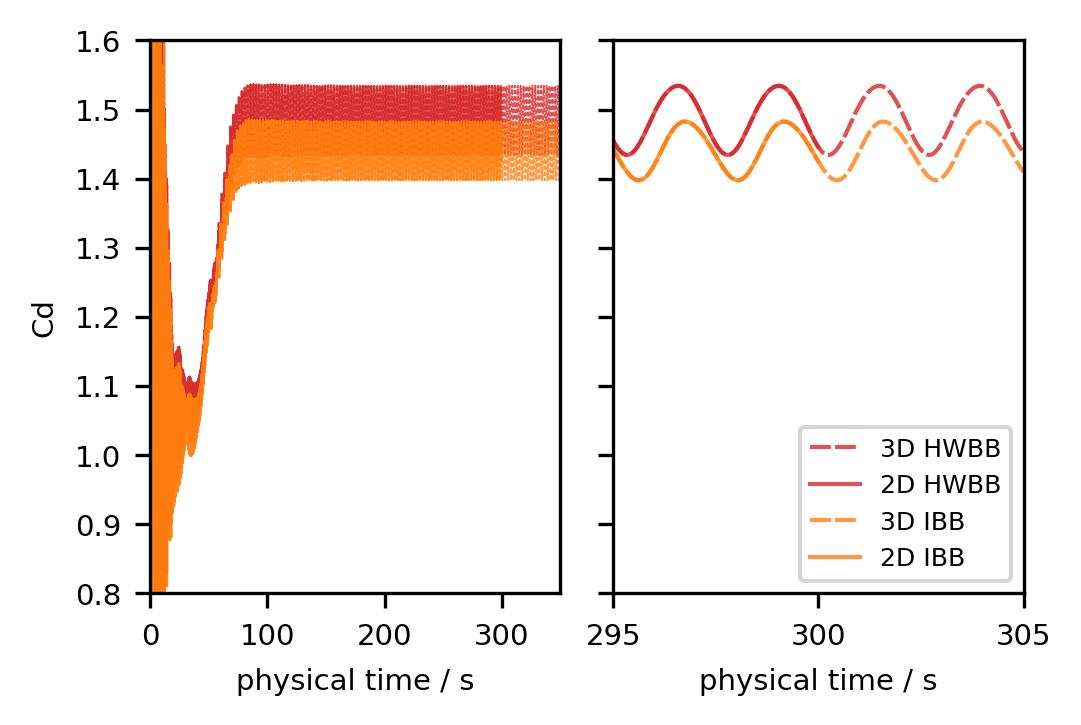

In [30]:
#fig, ax = plt.subplots()
fig, axs = plt.subplots(1,2)
for bc in bcs:
    if bc == "hwbbc2":
        bc_label = "HWBB"
        color="tab:red"
    elif bc == "ibb1c2":
        bc_label = "IBB"
        color="tab:orange"
    axs[0].plot(drag_timeseries_3d[bc+"_Re200"][:,1], drag_timeseries_3d[bc+"_Re200"][:,2], marker="", linewidth=0.5, label="3D "+bc_label, alpha=0.8, color=color, linestyle=(0, (2, 1)))
    axs[0].plot(drag_timeseries[bc+"_Re200"][:,1], drag_timeseries[bc+"_Re200"][:,2], marker="", linewidth=0.5, label="2D "+bc_label, alpha=0.8, color=color)

    axs[1].plot(drag_timeseries_3d[bc+"_Re200"][:,1], drag_timeseries_3d[bc+"_Re200"][:,2], marker="", label="3D "+bc_label, alpha=0.8, color=color, linestyle=(0, (5, 1)))
    axs[1].plot(drag_timeseries[bc+"_Re200"][:,1], drag_timeseries[bc+"_Re200"][:,2], marker="", label="2D "+bc_label, alpha=0.8, color=color)

    for ax in axs.flat:
        ax.set_xlabel("physical time / s")
        ax.label_outer()
        ax.set_ylim([0.8,1.6])

# axs.set_xlabel("physical time / s")
# ax.set_ylim([0.8,1.6])
axs[0].set_xlim([0,350])
axs[1].set_xlim([295,305])
axs[1].set_xticks([295, 300, 305])
axs[0].set_ylabel("Cd")
axs[1].legend(fontsize=6, loc="lower right")
#plt.savefig("/home/mbille/Desktop/2D vs 3D/drag_2D3D/Drag_COMB_Re200.png")
plt.savefig("/home/mbille/lettuce/plotting_mp2/plots/2D3D_Drag_timeseries_comparison_Re200.png")

# plot FWBB_KBC vs. FWBB_BGK, HWBB_KBC (LIFT)

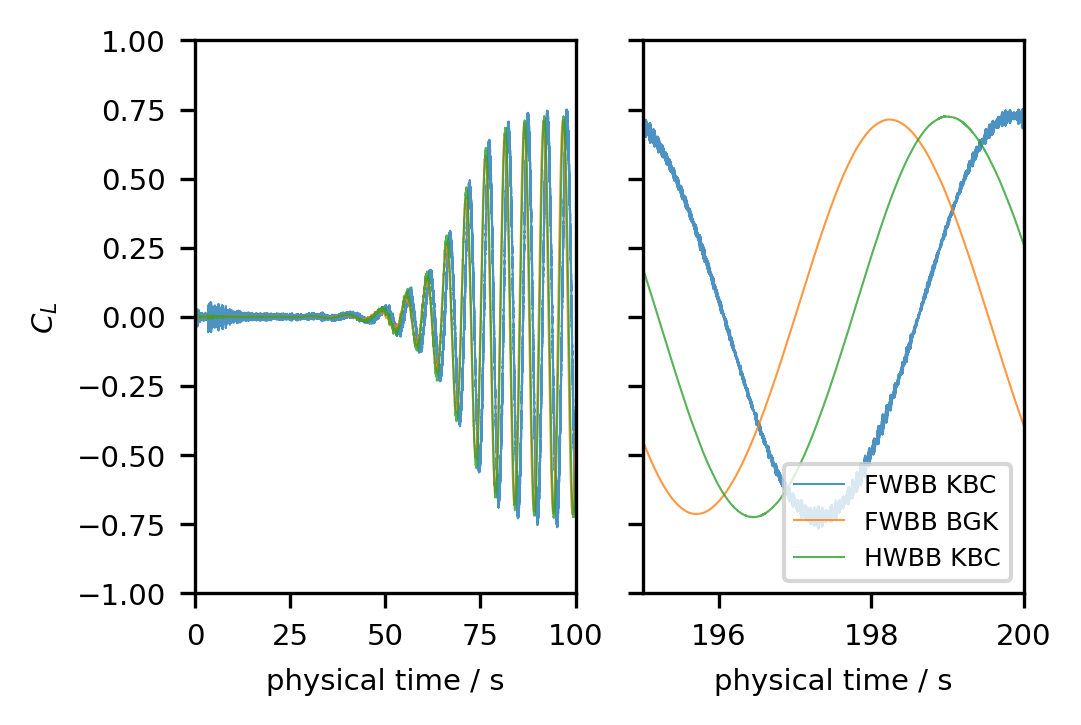

In [6]:
# DATA: Re200, GPD
# load timeseries
# plot timeseries like above (two-plot)
# (opt. shift timeseries on y to get better comparison (like vag-profiles)

lift_fwbb_kbc = np.loadtxt("/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_2D_GPD_BC_CO/data_230925_210158_2d_GPD30_fwbb_kbc/lift_coefficient.txt")
lift_fwbb_bgk = np.loadtxt("/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_2D_GPD_BC_CO/data_230925_210013_2d_GPD30_fwbb_bgk/lift_coefficient.txt")
lift_hwbb_kbc = np.loadtxt("/home/mbille/Documents/cluster_hbrs_home/02_lbm_simulations/data_2D_GPD_BC_CO/data_230925_212146_2d_GPD30_hwbb_kbc/lift_coefficient.txt")

fig, axs = plt.subplots(1,2)

axs[0].plot(lift_fwbb_kbc[:,1], lift_fwbb_kbc[:,2], marker="", linewidth=0.5, label="FWBB KBC", alpha=0.8)
axs[0].plot(lift_fwbb_bgk[:,1], lift_fwbb_bgk[:,2], marker="", linewidth=0.5, label="FWBB BGK", alpha=0.8)
axs[0].plot(lift_hwbb_kbc[:,1], lift_hwbb_kbc[:,2], marker="", linewidth=0.5, label="HWBB KBC", alpha=0.8)
axs[1].plot(lift_fwbb_kbc[:,1], lift_fwbb_kbc[:,2], marker="", linewidth=0.5, label="FWBB KBC", alpha=0.8)
axs[1].plot(lift_fwbb_bgk[:,1], lift_fwbb_bgk[:,2], marker="", linewidth=0.5, label="FWBB BGK", alpha=0.8)
axs[1].plot(lift_hwbb_kbc[:,1], lift_hwbb_kbc[:,2], marker="", linewidth=0.5, label="HWBB KBC", alpha=0.8)

for ax in axs.flat:
    ax.set_xlabel("physical time / s")
    ax.label_outer()
    ax.set_ylim([-1,1])

axs[0].set_xlim([0,100])
axs[1].set_xlim([195,200])
axs[0].set_ylabel("$C_L$")
axs[1].legend(fontsize=6, loc="lower right")

plt.savefig("/home/mbille/lettuce/plotting_mp2/plots/FWBB_KBC_oscillation.png")

## old stuff


In [ ]:
#output_path = "/mnt/ScratchHDD1/Max_Scratch/lbm_simulations"  # lokal HBRS
#output_path = "/home/max/Documents/lbm_simulations"  # lokal Bonn
output_path = "/home/mbille/Desktop"  # cluster_BONN

data1 = ""
#data2 = "/data_230406_150035_TtargetSearch_Re300.0_nsteps710140"

periodic_start=0.5

In [ ]:
drag_1 = np.loadtxt(str(output_path+data1+"/testRe3900_drag_coefficient.txt"))
#drag_2 = np.loadtxt(str(output_path+data2+"/drag_coefficient.txt"))
#drag_diff = drag_1-drag_2  # only applicable for same resolution => same step-number

print("drag_1.mean: ", drag_1[int(drag_1.shape[0]*periodic_start-1):,2].mean())
#print("drag_2.mean: ", drag_2[int(drag_2.shape[0]*periodic_start-1):,2].mean())
#print("drag_mean_diff", drag_1[int(drag_1.shape[0]*periodic_start-1):,2].mean() - drag_2[int(drag_2.shape[0]*0.8-1):,2].mean())
print("from t >", round(drag_1[int(drag_1.shape[0]*periodic_start-1),1],2))

In [ ]:
# FIND PEAKS and calc mean drag:

drag_1_stepsLU = drag_1[int(drag_1.shape[0]*periodic_start-1):,0]
drag_1_values = drag_1[int(drag_1.shape[0]*periodic_start-1):,2]

peaks_max = find_peaks(drag_1_values, prominence=((drag_1_values.max()-drag_1_values.min())/2))
peak_max_y = drag_1_values[peaks_max[0]]
peak_max_x = drag_1_stepsLU[peaks_max[0]]

peaks_min = find_peaks(-drag_1_values, prominence=((drag_1_values.max()-drag_1_values.min())/2))
peak_min_y = drag_1_values[peaks_min[0]]
peak_min_x = drag_1_stepsLU[peaks_min[0]]

if peaks_min[0].shape[0] - peaks_max[0].shape[0] > 0:
    peak_number = peaks_max[0].shape[0]
else:
    peak_number = peaks_min[0].shape[0]

if peaks_min[0][0] < peaks_max[0][0]:
    first_peak = peaks_min[0][0]
    last_peak = peaks_max[0][peak_number-1]
else:
    first_peak = peaks_max[0][0]
    last_peak = peaks_min[0][peak_number-1]

plt.plot(drag_1_stepsLU, drag_1_values)
plt.scatter(peak_max_x[:peak_number],peak_max_y[:peak_number],marker="+")
plt.scatter(peak_min_x[:peak_number],peak_min_y[:peak_number],marker="+")
plt.scatter(drag_1_stepsLU[first_peak],drag_1_values[first_peak],marker="o")
plt.scatter(drag_1_stepsLU[last_peak],drag_1_values[last_peak],marker="o")

drag_mean = drag_1_values[first_peak:last_peak].mean()
print(drag_mean)

In [ ]:
drag_1[-1,1]
len(drag_1[:,1])

In [ ]:
### IDEE
# - FFT Funktion, die für eine Datenreihe das Spektrum als [freqs, Xamp] zurückgibt
# - drag, drag_reduced und drag_rolling_mean mal im Sprketrum gegeneinander plotten.

In [ ]:
def moving_average(a, n) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
# die ersten n-1 Werte "fehlen"

In [ ]:
n = 100
drag_rolling_mean = moving_average(drag_1[:,2], n)
drag_rolling_mean_time = drag_1[n-1:,1]

In [ ]:
# PLOT DRAG

points = 2000
print("time_interval:", len(drag_1[:,1])/points)
interval = int(drag_1[-1,0]/points)
print("steps_interval:", interval)

drag_small = []

for i in range(drag_1.shape[0]):
    if i % interval == 0:
        drag_small.append(drag_1[i])
drag_small = np.array(drag_small)
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(drag_1[:,1],drag_1[:,2], drag_small[:,1], drag_small[:,2], drag_rolling_mean_time, drag_rolling_mean)
#ax.plot(drag_2[:,1],drag_2[:,2])
#ax.plot(drag_1[:,1],drag_diff[:,2])
ax.set_xlabel("physical time / s")
ax.set_ylabel("Coefficient of Drag Cd")
#ax.set_ylim([1,3])
ax.set_ylim([0.5,1.496])
#print(drag_diff[:,2].mean())
ax.set_xlim([190,200])
plt.legend(labels=["Drag_1", "Drag_reducedFreq", "Drag_rolling_mean"])
#plt.title("")

In [ ]:

### prototyped fft for frequency detection and calculation of strouhal-number
# ! Drag_frequency is 2* Strouhal-Freq. Lift-freq. is Strouhal-Freq.
drag_converged = drag_1[int(0.4*drag_1.shape[0]):,:]

X = np.fft.fft(drag_converged[:, 2])  # fft result (amplitudes)
N = len(X)  # number of freqs
n = np.arange(N)  # freq index
T = N*(drag_converged[2,1]-drag_converged[1,1]) # total time measured (T_PU)
freq = n / T  # frequencies (x-axis of spectrum)

plt.figure
plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")  # plot spectrum |X|(f)
plt.xlabel("Freq (Hz)")
plt.ylabel("FFT Amplitude |X(freq)|")
#plt.xlim(0,50)
# print("max. Amplitude np.abx(X).max():", np.abs(X).max())   # for debugging
plt.ylim(0, np.abs(X[10:int(X.shape[0] * 0.5)]).max())  # ylim, where highes peak is on left half of full spectrum

freq_res = freq[1] - freq[0]  # frequency-resolution
X_abs = np.abs(X[10:int(X.shape[0] * 0.4)])  # get |X| Amplitude for left half of full spectrum
freq_peak = freq[np.argmax(X_abs)]  # find frequency with highest amplitude
print("Frequency Peak:", freq_peak, "+-", freq_res, "Hz")
# f = Strouhal for St=f*D/U and D=U=1 in PU

print("T:", T)
print("df:", freq_res)
print("min.f:", 1/T)
print("max.f:", 1/(drag_converged[2,1]-drag_converged[1,1])*0.5)
plt.xlim(0,1/(drag_converged[2,1]-drag_converged[1,1])*0.4)
plt.ylim(0,1)

In [ ]:
lift_1 = np.loadtxt(str(output_path+data1+"/lift_coefficient.txt"))
#lift_2 = np.loadtxt(str(output_path+data2+"/lift_coefficient.txt"))
#lift_diff = lift_1-lift_2

print("Cl1_peaks: \nmin", lift_1[:,2].min(),"\nmax", lift_1[:,2].max())
#print("\nCl2_peaks: \nmin", lift_2[:,2].min(),"\nmax", lift_2[:,2].max())

In [ ]:
# PLOT LIFT

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(lift_1[:,1],lift_1[:,2])
#ax.plot(lift_2[:,1],lift_2[:,2])
#ax.plot(lift_1[:,1],lift_diff[:,2])
ax.set_xlabel("physical time / s")
ax.set_ylabel("Coefficient of Drag Cd")
ax.set_ylim([-3,3])
#ax.set_ylim([-0.01,0.01])
#ax.set_xlim([80,140])
#plt.legend(labels=["-", "-"])

In [ ]:
fig, ax = plt.subplots(layout="constrained")
drag_ax = ax.plot(drag_1[:,1],drag_1[:,2], color="tab:blue", label="Drag")
ax.set_xlabel("physical time / s")
ax.set_ylabel("Coefficient of Drag Cd")
ax.set_ylim([0.5,1.6])

#secax = ax.secondary_xaxis('top', functions=(flow.units.convert_time_to_lu, flow.units.convert_time_to_pu))
#secax.set_xlabel("timesteps (simulation time / LU)")

ax2 = ax.twinx()
lift_ax = ax2.plot(lift_1[:,1],lift_1[:,2], color="tab:orange", label="Lift")
ax2.set_ylabel("Coefficient of Lift Cl")
ax2.set_ylim([-1.1,1.1])


fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

In [ ]:
# Re200, GPD50, DPY50
drag = np.loadtxt("/home/mbille/Desktop/drag_coefficient.txt")
lift = np.loadtxt("/home/mbille/Desktop/lift_coefficient.txt")

matplotlib.rcParams.update({'font.size': 11})
matplotlib.rcParams.update({'lines.linewidth': 0.8})
matplotlib.rcParams.update({'figure.figsize': [3.2,2]})

fig, ax = plt.subplots(constrained_layout=True, )
ax.plot(drag[:,1],drag[:,2])
ax.set_xlabel("Zeit t / s")
ax.set_ylabel("$C_{D}$")
ax.set_ylim([0,1.6])
#ax.set_ylim([1.54,1.545])
#ax.set_xlim([500,600])
#secax = ax.secondary_xaxis('top', functions=(flow.units.convert_time_to_lu, flow.units.convert_time_to_pu))
#secax.set_xlabel("timesteps (simulation time / LU)")
plt.show()

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(lift[:,1],lift[:,2])
ax.set_xlabel("Zeit t / s")
ax.set_ylabel("$C_{L}$")
ax.set_ylim([-1,1])
#ax.set_ylim([1.54,1.545])
#ax.set_xlim([500,600])
#secax = ax.secondary_xaxis('top', functions=(flow.units.convert_time_to_lu, flow.units.convert_time_to_pu))
#secax.set_xlabel("timesteps (simulation time / LU)")
plt.show()

In [ ]:
# Re40, GPD50, DPY50
drag = np.loadtxt("/home/mbille/Desktop/drag_coefficient_40.txt")
#lift = np.loadtxt("/home/mbille/Desktop/lift_coefficient.txt")

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(drag[:,1],drag[:,2])
ax.set_xlabel("Zeit t / s")
ax.set_ylabel("$C_{D}$")
ax.set_ylim([0,3])
#ax.set_ylim([1.54,1.545])
#ax.set_xlim([500,600])
#secax = ax.secondary_xaxis('top', functions=(flow.units.convert_time_to_lu, flow.units.convert_time_to_pu))
#secax.set_xlabel("timesteps (simulation time / LU)")
plt.show()